# Import libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Normalize values

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

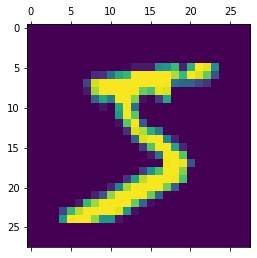

In [ ]:
plt.matshow(X_train[0])

# Model 1

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2908 - accuracy: 0.9181
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1378 - accuracy: 0.9602
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1008 - accuracy: 0.9700
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0784 - accuracy: 0.9763
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0653 - accuracy: 0.9804
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0531 - accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0445 - accuracy: 0.9863
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0393 - accuracy: 0.9878
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0314 - accuracy: 0.9906
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.027

# Evaluation

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0818 - accuracy: 0.9768


[0.08175394684076309, 0.9768000245094299]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted[0]

array([2.8317875e-09, 4.1160927e-10, 1.1644753e-07, 7.3369913e-05,
       5.6984132e-13, 7.2735681e-08, 1.5428370e-14, 3.5157424e-01,
       2.6300208e-07, 1.2761718e-06], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    0,    1,    5,    3,    1,    2,    1],
       [   0, 1127,    1,    1,    0,    1,    2,    0,    3,    0],
       [   4,    1, 1001,    7,    3,    1,    2,    6,    7,    0],
       [   0,    0,    4,  977,    1,   17,    0,    2,    4,    5],
       [   1,    0,    3,    1,  964,    1,    4,    2,    0,    6],
       [   1,    0,    0,    1,    2,  882,    3,    0,    2,    1],
       [   4,    3,    1,    1,    4,   15,  930,    0,    0,    0],
       [   0,    5,    7,    4,    1,    0,    1,  994,    4,   12],
       [   1,    0,    2,    4,    4,    9,    1,    2,  946,    5],
       [   1,    4,    0,    3,   11,    5,    0,    1,    3,  981]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

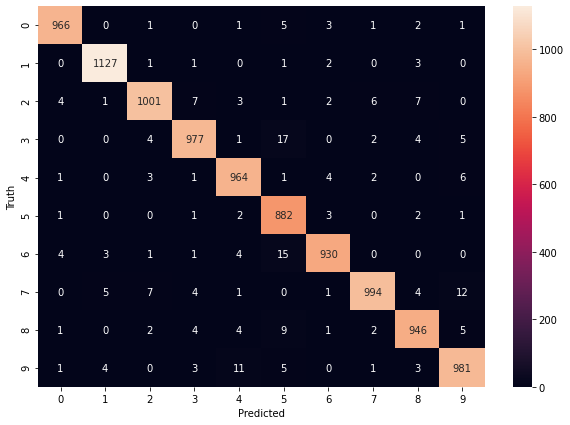

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Model 2

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)
model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3312 - accuracy: 0.9082
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1747 - accuracy: 0.9499
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1288 - accuracy: 0.9623
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1036 - accuracy: 0.9696
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0866 - accuracy: 0.9734
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0746 - accuracy: 0.9778
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0652 - accuracy: 0.9804
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0576 - accuracy: 0.9826
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0506 - accuracy: 0.9847
Epoch 10/10
313/313 [==============================] - 0s 928us/step - loss: 0.095

[0.0952017605304718, 0.9711999893188477]

## Evaluation model 2

Text(69.0, 0.5, 'Truth')

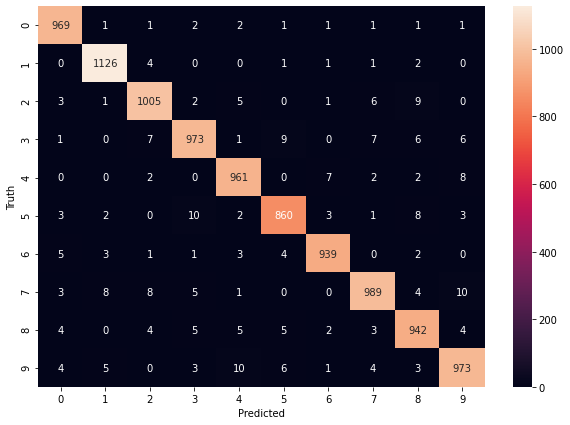

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Model 3

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)
model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3373 - accuracy: 0.9060
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1722 - accuracy: 0.9508
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1288 - accuracy: 0.9624
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1050 - accuracy: 0.9695
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0878 - accuracy: 0.9735
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0757 - accuracy: 0.9785
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0657 - accuracy: 0.9809
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0583 - accuracy: 0.9831
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0513 - accuracy: 0.9857
Epoch 10/10
313/313 [==============================] - 0s 999us/step - loss: 0.094

[0.0949418768286705, 0.9724000096321106]